In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

收益计算函数

In [2]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class Operation(Enum):
    buy = 0
    sell = 1

class Option(object):
    def __init__(self,
                 operation: Operation=None,
                 option_price: float=None,
                 strike_price: float=None,
                 multiplier: int=None,
                 number: int=None):
        self.operation = operation
        self.option_price = option_price
        self.strike_price = strike_price
        self.multiplier = multiplier
        self.number = number

class Call(Option):
    pass

class Put(Option):
    pass

class Stock(object):
    def __init__(self,
                 operation: Operation=None,
                 stock_price: float=None,
                 number: int=None):
        self.operation = operation
        self.stock_price = stock_price
        self.number = number
        
class GainCalculation(object):
    def __init__(self):
        self.gain: float = None
    def __call__(self,
                 actual_price: float,
                 call_list: list = [],
                 put_list: list = [],
                 stock_list: list = [],
                 *args,
                 **kwargs):
        self.call_list = call_list
        self.put_list = put_list
        self.stock_list= stock_list
        self.actual_price = actual_price
        self.gain = 0.0
        for call in self.call_list:
            if call.operation == Operation.buy: 
                 self._process_buy_call(call)
            else:
                 self._process_sell_call(call)

        for put in self.put_list:
            if put.operation == Operation.buy: 
                 self._process_buy_put(put)
            else:
                 self._process_sell_put(put)

        for stock in self.stock_list:
            if stock.operation == Operation.buy: 
                 self._process_buy_stock(stock)
            else:
                 self._process_sell_stock(stock)

    def _process_buy_call(self, call: Call):
        if self.actual_price > call.strike_price:
            price_diff: float = self.actual_price - call.strike_price
            # the value gained by executing option
            self.gain = self.gain + price_diff * call.multiplier * call.number
            # the value lost by option price
            self.gain = self.gain - call.option_price * call.number * call.multiplier
        else:
            # the value lost by option price
            self.gain = self.gain - call.option_price * call.number * call.multiplier
    def _process_sell_call(self, call: Call):
        if self.actual_price > call.strike_price:
            price_diff: float = self.actual_price - call.strike_price
            # the value lost by buyer executing option
            self.gain = self.gain - price_diff * call.multiplier * call.number
            # the value gain by option price
            self.gain = self.gain + call.option_price * call.number * call.multiplier
        else:
            # the value gain by option price
            self.gain = self.gain + call.option_price * call.number * call.multiplier
            
    def _process_buy_put(self, put: Put):
        if self.actual_price < put.strike_price:
            price_diff: float = put.strike_price - self.actual_price
            # the value gained by executing option
            self.gain = self.gain + price_diff * put.multiplier * put.number
            # the value lost by option price
            self.gain = self.gain - put.option_price * put.number * put.multiplier
        else:
            # the value lost by option price
            self.gain = self.gain - put.option_price * put.number * put.multiplier

    def _process_sell_put(self, put: Put):
        if self.actual_price < put.strike_price:
            price_diff: float = put.strike_price - self.actual_price
            # the value gained by executing option
            self.gain = self.gain - price_diff * put.multiplier * put.number
            # the value lost by option price
            self.gain = self.gain + put.option_price * put.number * put.multiplier
        else:
            # the value lost by option price
            self.gain = self.gain + put.option_price * put.number * put.multiplier

    def _process_buy_stock(self, stock: Stock):
        price_diff: float = self.actual_price - stock.stock_price
        # the value gained by selling stock
        self.gain = self.gain + price_diff * stock.number

    def _process_sell_stock(self, stock: Stock):
        price_diff: float = stock.stock_price - self.actual_price
        # the value gained by buy back stock
        self.gain = self.gain + price_diff * stock.number

def plot_gain_distribution(actual_price_start,
                           actual_price_stop,
                           step: int,
                           call_list: list=[],
                           put_list: list=[],
                           stock_list: list=[]):
    actual_price_array = np.arange(actual_price_start,actual_price_stop,step)
    gain_list = []

    for actual_price in actual_price_array:
        gain_calculate = GainCalculation()
        gain_calculate(call_list=call_list,
                       put_list=put_list,
                       stock_list=stock_list,
                       actual_price=actual_price)
        gain_list.append(gain_calculate.gain)

    _ = plt.plot(actual_price_array, gain_list)
    _ = plt.plot([-10000,10000],[0,0])
    _ = plt.xlim(actual_price_start,actual_price_stop)
    _ = plt.grid()
    _ = plt.xlabel('actual price')
    _ = plt.ylabel('strategy gain')

# 1. 蝶式期权

卖2个平值看涨期权， 对称买两个实值和虚值看涨期权

注：价格参考一般未到期期权价格曲线。 所以行权价90的要比行权价110的贵

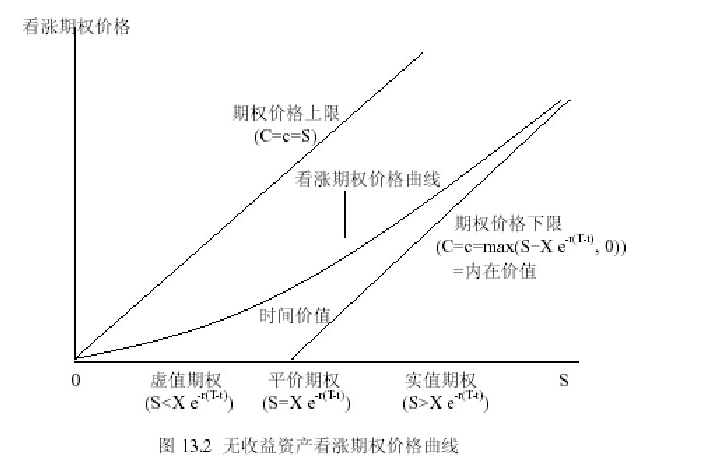

In [36]:
call_1 = Call(operation=Operation.sell,
              option_price=4,
              strike_price=100,
              multiplier=100,
              number=1)

call_2 = Call(operation=Operation.sell,
              option_price=4,
              strike_price=100,
              multiplier=100,
              number=1) 

call_3 = Call(operation=Operation.buy,
              option_price=2,
              strike_price=110,
              multiplier=100,
              number=1)

call_4 = Call(operation=Operation.buy,
              option_price=8,
              strike_price=90,
              multiplier=100,
              number=1)

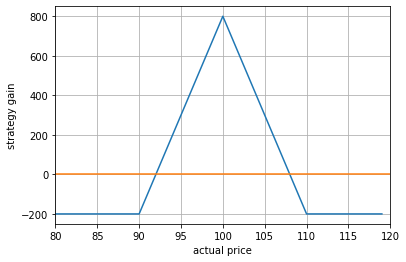

In [37]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_1, call_2, call_3, call_4],
                       put_list=[],
                       stock_list=[])

以下是拆解每个期权的收益图

call_1

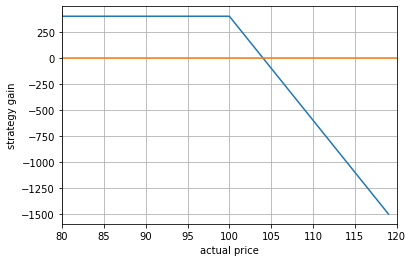

In [38]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_1],
                       put_list=[],
                       stock_list=[])

call_2

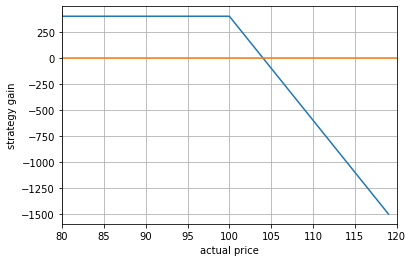

In [39]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_2],
                       put_list=[],
                       stock_list=[])

call_3

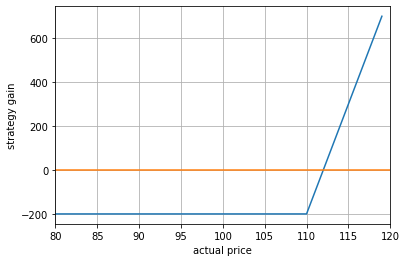

In [40]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_3],
                       put_list=[],
                       stock_list=[])

call_4

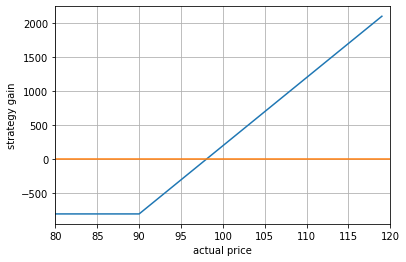

In [41]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_4],
                       put_list=[],
                       stock_list=[])

如果两两结合分析，碟式期权相当于两个价差组合

call_1结合call_3 贷方策略，赚权利金，但是最大风险很大， 要亏-800

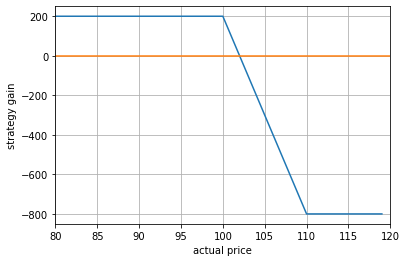

In [43]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_1, call_3],
                       put_list=[],
                       stock_list=[])

call_2结合call_4 借方策略，赚期权的钱，但是只要低于90块就要亏400

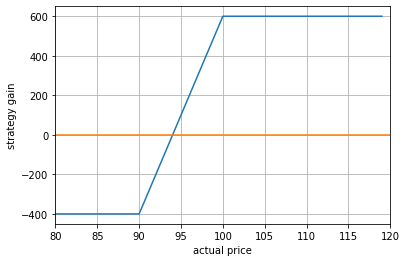

In [44]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_2, call_4],
                       put_list=[],
                       stock_list=[])

蝶式期权相当于中和了这两个价差的缺点，放弃单边的稳定收益但是减少了另外一边亏的钱的值: 为了稳定。

# 2. 铁蝶式期权

与鹰式策略有点像，但是卖的两个期权价格相同

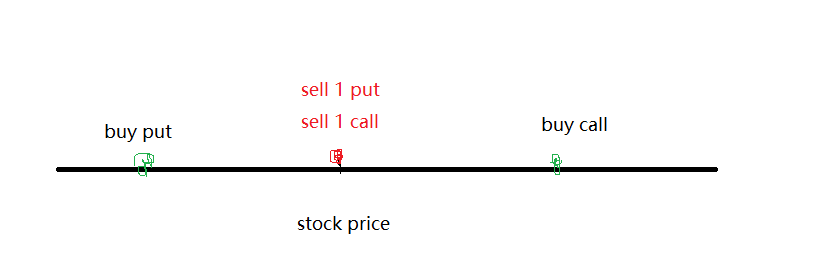


In [3]:
call_1 = Call(operation=Operation.sell,
              option_price=4,
              strike_price=100,
              multiplier=100,
              number=1)

put_1 = Put(operation=Operation.sell,
            option_price=4,
            strike_price=100,
            multiplier=100,
            number=1) 

call_2 = Call(operation=Operation.buy,
              option_price=2,
              strike_price=110,
              multiplier=100,
              number=1)

put_2 = Put(operation=Operation.buy,
              option_price=2,
              strike_price=90,
              multiplier=100,
              number=1)

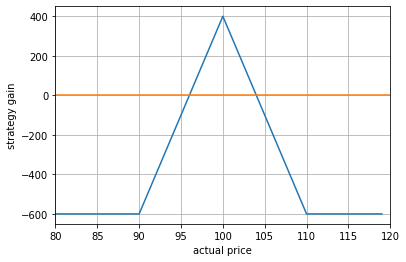

In [4]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_1, call_2],
                       put_list=[put_1, put_2],
                       stock_list=[])

以下是鹰式期权回顾
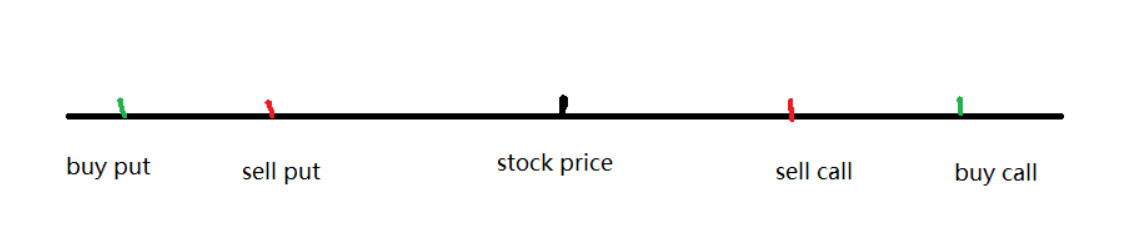

In [5]:
call_1 = Call(operation=Operation.sell,
              option_price=3,
              strike_price=105,
              multiplier=100,
              number=1)

put_1 = Put(operation=Operation.sell,
            option_price=3,
            strike_price=95,
            multiplier=100,
            number=1) 

call_2 = Call(operation=Operation.buy,
              option_price=2,
              strike_price=110,
              multiplier=100,
              number=1)

put_2 = Put(operation=Operation.buy,
              option_price=2,
              strike_price=90,
              multiplier=100,
              number=1)

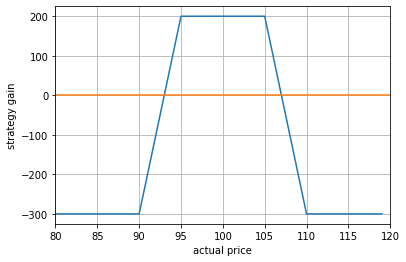

In [6]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_1, call_2],
                       put_list=[put_1, put_2],
                       stock_list=[])

对比一般铁鹰式和一般铁蝶式，铁蝶卖的价格更倾向实值因此风险更高，收益也更高。铁鹰相对来说更稳

对比一般蝶式，蝶式的缺点在于那个买的实值期权可能非常贵。

# 3. 非标准蝶式组合

通过购买多个期权,做出奇怪的损益图

In [28]:
call_1 = Call(operation=Operation.sell,
              option_price=4,
              strike_price=100,
              multiplier=100,
              number=1)

call_2 = Call(operation=Operation.sell,
              option_price=4,
              strike_price=100,
              multiplier=100,
              number=1) 

call_3 = Call(operation=Operation.buy,
              option_price=2,
              strike_price=110,
              multiplier=100,
              number=1)

call_4 = Call(operation=Operation.buy,
              option_price=8,
              strike_price=90,
              multiplier=100,
              number=1)


call_5 = Call(operation=Operation.buy,
              option_price=6,
              strike_price=105,
              multiplier=100,
              number=1)

call_6 = Call(operation=Operation.buy,
              option_price=3,
              strike_price=95,
              multiplier=100,
              number=1)

call_7 = Call(operation=Operation.sell,
              option_price=3.5,
              strike_price=98,
              multiplier=100,
              number=1)

call_8 = Call(operation=Operation.sell,
              option_price=4.5,
              strike_price=102,
              multiplier=100,
              number=1) 

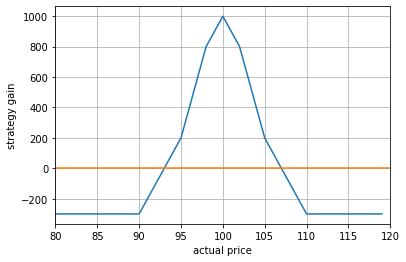

In [29]:
plot_gain_distribution(actual_price_start=80,
                       actual_price_stop=120,
                       step=1,
                       call_list=[call_1, call_2, call_3, call_4, call_5, call_6, call_7, call_8],
                       put_list=[],
                       stock_list=[])

# 4. 蝶式期权实战

假设股票价格1000，先买以下组合

In [3]:
put_1 = Put(operation=Operation.buy,
              option_price=17,
              strike_price=990,
              multiplier=100,
              number=1)

put_2 = Put(operation=Operation.sell,
            option_price=9.5,
            strike_price=960,
            multiplier=100,
            number=1) 

put_3 = Put(operation=Operation.sell,
              option_price=9.5,
              strike_price=960,
              multiplier=100,
              number=1)

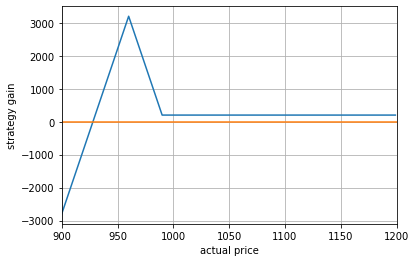

In [6]:
plot_gain_distribution(actual_price_start=900,
                       actual_price_stop=1200,
                       step=1,
                       call_list=[],
                       put_list=[put_1, put_2, put_3],
                       stock_list=[])

如果股价暴涨，那么可以买到一个便宜的保险价位的看跌期权

In [7]:
put_4 = Put(operation=Operation.buy,
              option_price=1,
              strike_price=930,
              multiplier=100,
              number=1)

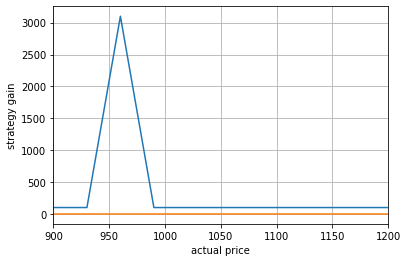

In [8]:
plot_gain_distribution(actual_price_start=900,
                       actual_price_stop=1200,
                       step=1,
                       call_list=[],
                       put_list=[put_1, put_2, put_3, put_4],
                       stock_list=[])

可以看到策略组合变为了无风险